# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Context:

A large e-commerce company has contracted us to provide delivery services from several of their warehouses(or sites) to customers' doorsteps at several locations across the country.

The dataset contains information about the performance of our delivery agents working at our client's sites across cities in India.

The idea of this exercise is to gain insights into their performance and make data driven strategic recommendations for imporvement.

***NOTE: The dataset contains information for only one month, i.e June 2023***

# Features in the Dataset
* Site Code - A unique ID belonging to the site at which our delivery agents work.
* City - Name of the city in which the site is located.
* Vehicle Type - "Van DCD" means the delivery agent drives his own van and delivers packages. "Bike" means the delivery agent rides his own bike and delivers packages. "Van D+DA" means the delivery agent doesn't drive, but is instead driven around the city by a van driver.
* Cluster - Cities are grouped into clusters based on certain characteristics.
* Date - The date that the delivery agent reported for work.
* Delivery Agent ID - A unique identifier assigned to each delivery agent who works with us.
* Shift - "A" indicates morning, "B" indicates afternoon, "C" indicates evening.
* Unsuccessful_Attempts - The number of packages that the delivery agent attempted to deliver, but the delivery was not possible for various reasons
* Process_Deviations - The number of times the delivery agent deviated from the process during the shift.
* Delivered - The number of packages that the delivery agent delivered during the shift.
* Customer_Rejects - The number of packages that customers rejected when the delivery agent went to deliver them.
* Picked_up_Customer_Returns - The number of packages the delivery agent picked up from customers who wanted to return something that they had ordered earlier.
* Picked_up_Seller - The number of packages that the delivery agent picked up from sellers on the platform. These packages would be sent out for delivery to customers the next day.
* billing_amt - The amount that we bill our clients for the services rendered by our delivery agents.


# Question 1

Load the dataset into a dataframe and name it "daily_df". Display a sample of 10 random rows, display the shape of the dataset, the datatypes of each column, and check for missing values.

In [2]:
daily_df = pd.read_excel('Python Ninja - Advanced - Dataset.xlsx')
daily_df.sample(n=10)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt
10232,Site_3,BANGALORE,Van DCD,4,2023-06-03,DA_318,A,1,0,80,2,14,0,2150
1103,Site_14,MUMBAI,Bike,3,2023-06-13,DA_290,C,0,4,11,0,4,0,540
9708,Site_2,BHOPAL,Van DCD,1,2023-06-09,DA_541,A,1,3,89,4,15,0,2050
8303,Site_3,BANGALORE,Van DCD,4,2023-06-17,DA_7,B,4,2,19,0,0,0,1423
10761,Site_13,THANE,Bike,3,2023-06-12,DA_259,A,0,0,8,0,40,0,941
4229,Site_12,MUMBAI,Bike,3,2023-06-21,DA_216,A,0,0,0,0,28,0,901
2074,Site_4,BANGALORE,Bike,4,2023-06-07,DA_76,B,3,0,36,0,2,0,776
7236,Site_21,HYDERABAD,Bike,4,2023-06-02,DA_19,A,0,0,10,0,26,0,967
6134,Site_3,BANGALORE,Bike,4,2023-06-10,DA_221,C,2,0,4,2,14,0,580
2895,Site_16,BANGALORE,Van DCD,4,2023-06-08,DA_291,A,0,2,122,4,7,0,2231


In [3]:
daily_df.shape

(11279, 14)

In [4]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11279 entries, 0 to 11278
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Site Code                   11279 non-null  object        
 1   city                        11279 non-null  object        
 2   Vehicle_type                11279 non-null  object        
 3   cluster                     11279 non-null  int64         
 4   Date                        11279 non-null  datetime64[ns]
 5   Delivery Agent ID           11279 non-null  object        
 6   Shift                       11279 non-null  object        
 7   Unsuccessful_Attempts       11279 non-null  int64         
 8   Process_Deviations          11279 non-null  int64         
 9   Delivered                   11279 non-null  int64         
 10  Customer_Rejects            11279 non-null  int64         
 11  Picked_up_Customer_Returns  11279 non-null  int64     

In [5]:
daily_df.isna().sum()

Site Code                     0
city                          0
Vehicle_type                  0
cluster                       0
Date                          0
Delivery Agent ID             0
Shift                         0
Unsuccessful_Attempts         0
Process_Deviations            0
Delivered                     0
Customer_Rejects              0
Picked_up_Customer_Returns    0
Picked up_Seller              0
billing_amt                   0
dtype: int64

There is no null values in the data by default

# Question 2

**Part-A**

You will notice that there are delivery agents who have used different vehicle types in different shifts.

Find what vehicle type was used for majority of the shifts, then overwrite all the other minority values with the majority values.

For example - if DA_1 used a bike in 20 shifts and used a van in 2 shifts, you need to make sure that the "Vehicle Type" for all 22 shifts is set to "Bike" as that was used for majority of the shifts.

In [6]:
daily_df['Shift'] = daily_df['Shift'].map({'A':1,'B':2,'C':3})

In [7]:
daily_df['Shift'].value_counts()

1    5129
2    3262
3    2888
Name: Shift, dtype: int64

group by the vehicle type with shift

In [8]:
#group by vechile type 
vehicle_type =daily_df.groupby(['Vehicle_type'])['Shift'].size()
vehicle_type

Vehicle_type
Bike        6007
Van D+DA    1602
Van DCD     3670
Name: Shift, dtype: int64

In [9]:
#finding the maximuim shifts 
majority_vehicle_type = vehicle_type.idxmax()

Adding a cloumns to the data set with majority_vehicle_type

In [10]:
daily_df['Majority_vehicle_type'] = majority_vehicle_type
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Majority_vehicle_type
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,1,0,0,3,1,26,0,955,Bike
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,1,0,9,60,1,20,0,2075,Bike
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,3,2,0,15,0,2,0,571,Bike
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,2,1,0,15,0,0,0,1275,Bike
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,2,5,0,40,1,0,0,1353,Bike


In [11]:
daily_df['Majority_vehicle_type'].value_counts()

Bike    11279
Name: Majority_vehicle_type, dtype: int64

**Part-B:**

Total assigned packages can be calculated using the following formula:

Total Assigned = Unsuccessful_Attempts + Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller

Use this formula and add a new column in the dataframe called "Total Assigned"

In [12]:
daily_df.columns

Index(['Site Code', 'city', 'Vehicle_type', 'cluster', 'Date',
       'Delivery Agent ID', 'Shift', 'Unsuccessful_Attempts',
       'Process_Deviations', 'Delivered', 'Customer_Rejects',
       'Picked_up_Customer_Returns', 'Picked up_Seller', 'billing_amt',
       'Majority_vehicle_type'],
      dtype='object')

Calculation of above formula 

In [13]:
#calculation
daily_df['Unsuccessful_Attempts'] + daily_df['Delivered'] + daily_df['Customer_Rejects'] + daily_df['Picked_up_Customer_Returns'] + daily_df['Picked up_Seller'] 

0        30
1        81
2        19
3        16
4        46
         ..
11274    42
11275    24
11276    30
11277    78
11278    23
Length: 11279, dtype: int64

Assigning the Total Assigned calucation values column to the data set.

In [14]:
# assigning the column
daily_df['Total Assigned'] = daily_df['Unsuccessful_Attempts'] + daily_df['Delivered'] + daily_df['Customer_Rejects'] + daily_df['Picked_up_Customer_Returns'] + daily_df['Picked up_Seller'] 

In [15]:
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Majority_vehicle_type,Total Assigned
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,1,0,0,3,1,26,0,955,Bike,30
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,1,0,9,60,1,20,0,2075,Bike,81
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,3,2,0,15,0,2,0,571,Bike,19
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,2,1,0,15,0,0,0,1275,Bike,16
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,2,5,0,40,1,0,0,1353,Bike,46


**Part-C:**

"Productivity" is a metric that aims at measuring how much work a delivery agent is doing during his shift. This can later be compared with the rest of the workforce to identify delivery agents who are both - outperforming as well as under performing.  

It can be calculated using the following formula:

Productivity = Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller.

Calculate "Productivity" and show it in a new column in the daily_df.


In [16]:
# adding a new column in the daily_df
daily_df['Productivity']= daily_df['Delivered'] + daily_df['Customer_Rejects'] + daily_df['Picked_up_Customer_Returns'] + daily_df['Picked up_Seller']

In [17]:
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Majority_vehicle_type,Total Assigned,Productivity
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,1,0,0,3,1,26,0,955,Bike,30,30
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,1,0,9,60,1,20,0,2075,Bike,81,81
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,3,2,0,15,0,2,0,571,Bike,19,17
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,2,1,0,15,0,0,0,1275,Bike,16,15
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,2,5,0,40,1,0,0,1353,Bike,46,41


**Part-D:**

Analyze the data and report the ranges of productivity that different vehicle types have in different types of shifts. What are your observations?

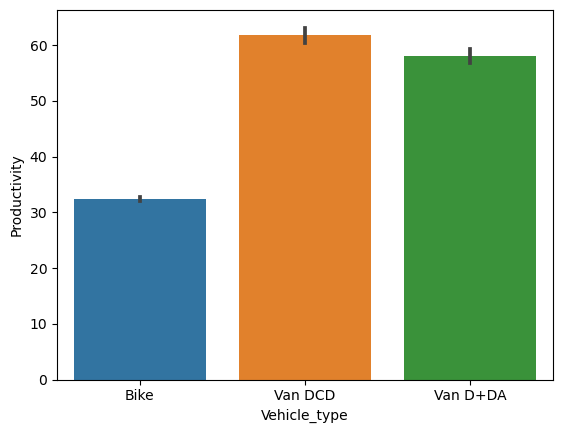

In [18]:
sns.barplot(x = 'Vehicle_type',y ='Productivity',data = daily_df)
plt.show()

Van DCD" means the delivery agent drives his own van and delivers packages has more productivity capacity and   "Van D+DA" means the delivery agent doesn't drive, but is instead driven around the city by a van driver  aslo have more productivity. by looking the graph we can say that the delivery agent drives his own van and delivers packages is highly effictive compare to others .

"Bike" means the delivery agent rides his own bike and delivers packages .

comparing with shift wise 

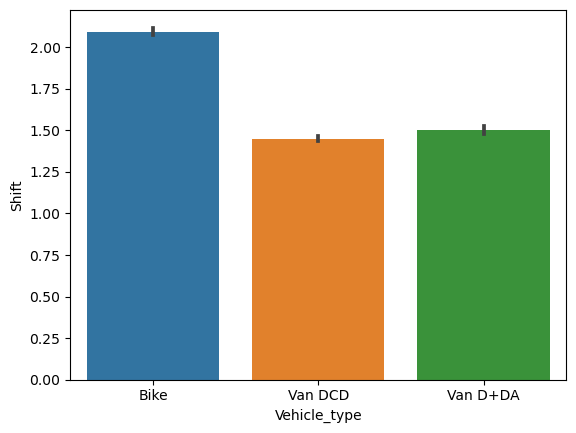

In [19]:
sns.barplot(x = 'Vehicle_type',y ='Shift',data = daily_df)
plt.show()

delivery agent are prefering bikes over the others type of vechile."Bike" means the delivery agent rides his own bike and delivers packages. 

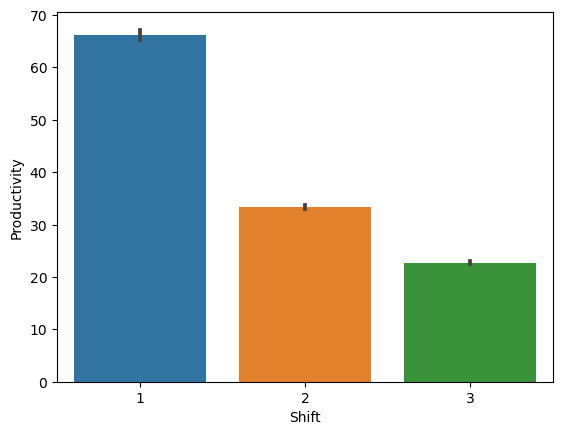

In [20]:
sns.barplot(x ='Shift',y = 'Productivity',data = daily_df)
plt.show()

By looking the data we can clearly see than morning shit as more productivity in deliverying the goods 

**Part E:**

Low productivity adversely affects both - service levels as well as unit level economics of the business. Curbing this is quintessential to running a good operation.

Now that you have a sense of the productivity levels of different vehicle types in each shift, use this information to formulate logic to classify all the samples across all shifts as either "productivity-ok" or "productivity-low". Add this information into a column called "Productivity Category".

* Keep in mind that the productivity of one vehicle type is not comparable to the other. A bike may travel faster when there is more traffic. A van may be able to carry a much larger number of packages, etc...

* Keep in mind that productivity from Shift A is not comparable to productivity from Shifts B or C or vice versa. Each shift should have it's own threshold for defining low productivity.

* Most importantly, keep in mind that the ideal solution would be to identify a smaller set of people who contribute to the largest part of the problem.

* You are not being given any specific formula here to do this. You will need to think creatively and also give an explanation of your method and why you chose to do things that way.

In [21]:
daily_df['Productivity'].quantile(0.75)

57.0

In [22]:
thresholds = {
    1: {
        'Bike': 57.0,
        'Van DCD': 50.0,
        'Van D+DA': 53.0
    },
    2: {
        'Bike': 57.0,
        'Van DCD': 50.7,
        'Van D+DA':53.0
    },
    3: {
        'Bike': 57.5,
        'Van DCD': 50.6,
        'Van D+DA':53.0
    }
}

In [23]:
# Function to classify productivity category
def classify_productivity(daily_df):
    shift = daily_df['Shift']
    vehicle_type = daily_df['Vehicle_type']
    threshold = thresholds[shift][vehicle_type]
    
    if daily_df['Productivity'] < threshold:
        return 'productivity-low'
    else:
        return 'productivity-ok'


In [24]:
# Apply classification function and create "Productivity Category" column
daily_df['Productivity Category'] = daily_df.apply(classify_productivity, axis=1)

In [25]:
daily_df['Productivity Category'].value_counts()

productivity-low    8189
productivity-ok     3090
Name: Productivity Category, dtype: int64

# Question 3

**Part A:**

The daily_df contains information of how each delivery agent performed on each day that they reported in June 2023. Create a new dataframe that summarizes the performance of each delivery agent for the entire month of June 2023, using the data from the daily_df.

Name this new dataframe "monthly_df".

The new dataframe should contain the following columns:
* Delivery Agent ID
* Vehicle Type
* Cluster
* City
* Site Code
* Shifts Worked
* Total Assigned
* Unsuccessful_Attempts
* Process_Deviations
* Productivity
* billing_amt

In [26]:
daily_df.columns

Index(['Site Code', 'city', 'Vehicle_type', 'cluster', 'Date',
       'Delivery Agent ID', 'Shift', 'Unsuccessful_Attempts',
       'Process_Deviations', 'Delivered', 'Customer_Rejects',
       'Picked_up_Customer_Returns', 'Picked up_Seller', 'billing_amt',
       'Majority_vehicle_type', 'Total Assigned', 'Productivity',
       'Productivity Category'],
      dtype='object')

In [27]:
monthly_df =daily_df[['Delivery Agent ID','Vehicle_type','cluster','city','Site Code','Total Assigned','Unsuccessful_Attempts','Process_Deviations','Productivity','billing_amt']]

In [28]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955
1,DA_273,Van DCD,4,BANGALORE,Site_10,81,0,9,81,2075
2,DA_370,Bike,4,BANGALORE,Site_3,19,2,0,17,571
3,DA_118,Van DCD,4,BANGALORE,Site_10,16,1,0,15,1275
4,DA_136,Van DCD,4,BANGALORE,Site_4,46,5,0,41,1353


**Part B:**

"Delivery Success Rate(DSR)" is a metric that measures the quality of a delivery agent's work. If an angent has low DSR, it means that he/she would have a higher number of unsuccessful attempts.

DSR can be calculated using the following formula:

DSR = Productivity / Total Assigned.

Using this formula, calculate and add a new column called "DSR" in the monthly_df. Round the values to 2 decimal placecs.

In [29]:
monthly_df['DSR'] = round(monthly_df['Productivity']/monthly_df['Total Assigned'],2)

In [30]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,1.00
1,DA_273,Van DCD,4,BANGALORE,Site_10,81,0,9,81,2075,1.00
2,DA_370,Bike,4,BANGALORE,Site_3,19,2,0,17,571,0.89
3,DA_118,Van DCD,4,BANGALORE,Site_10,16,1,0,15,1275,0.94
4,DA_136,Van DCD,4,BANGALORE,Site_4,46,5,0,41,1353,0.89


**Part C:**

The productivity in the monthly_df is an aggregate of the whole month's productivity. Create a new column called "Avg_Productivity" that contains the average productivity per shift of each delivery agent. The values in this column should be expressed as integers.

Do the same with Process_Deviations. Calculate the average number of deviations per shift worked and put it into a column called "Avg_Deviations". Here the values should be rounded to 2 decimal places

In [31]:
monthly_df['Avg_Productivity'] = round(monthly_df['Productivity']/daily_df['Shift'],2)

In [32]:
monthly_df['Avg_Deviations'] = round(monthly_df['Process_Deviations']/daily_df['Shift'],2)

In [33]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,1.00,30.00,0.0
1,DA_273,Van DCD,4,BANGALORE,Site_10,81,0,9,81,2075,1.00,81.00,9.0
2,DA_370,Bike,4,BANGALORE,Site_3,19,2,0,17,571,0.89,5.67,0.0
3,DA_118,Van DCD,4,BANGALORE,Site_10,16,1,0,15,1275,0.94,7.50,0.0
4,DA_136,Van DCD,4,BANGALORE,Site_4,46,5,0,41,1353,0.89,20.50,0.0


**Part D:**

Examine the distributions of the features in the monthly_df in both forms - tabular and plotted.

All columns that contain categorical information (data that has no ordinal value) should be shown as bar graphs. All columns that contain numerical data (data with ordinal value) should be shown as distribution curves or histograms.

State your observations and inferences.

In [34]:
num = []
for i in monthly_df :
    if monthly_df[i].dtypes != 'object':
        num.append(i)
num

['cluster',
 'Total Assigned',
 'Unsuccessful_Attempts',
 'Process_Deviations',
 'Productivity',
 'billing_amt',
 'DSR',
 'Avg_Productivity',
 'Avg_Deviations']

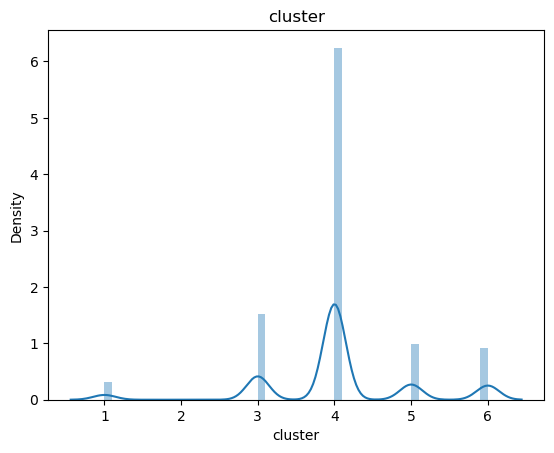

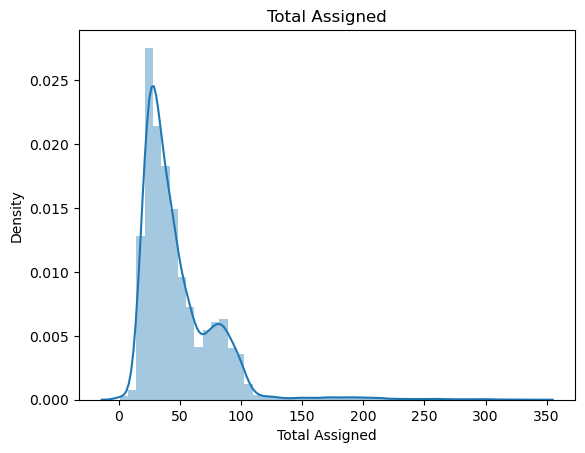

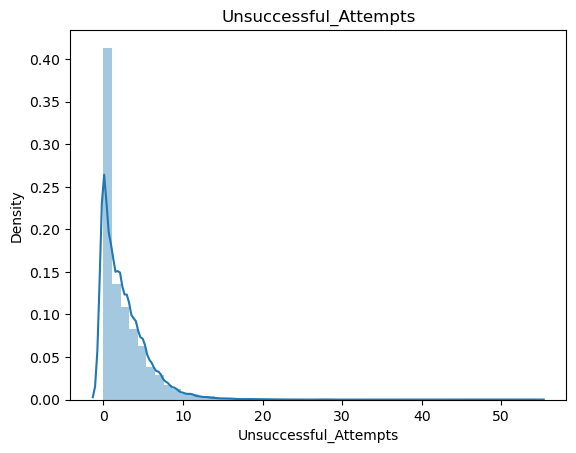

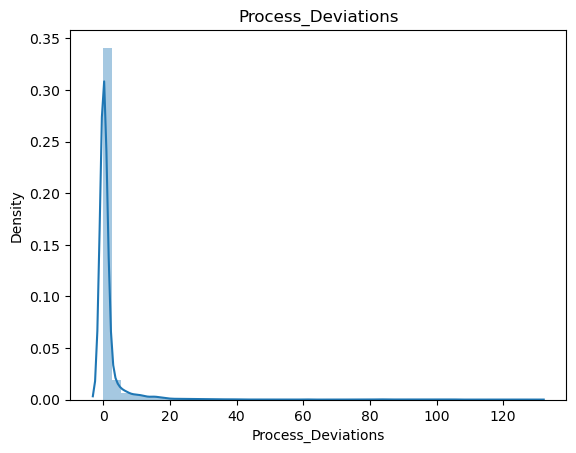

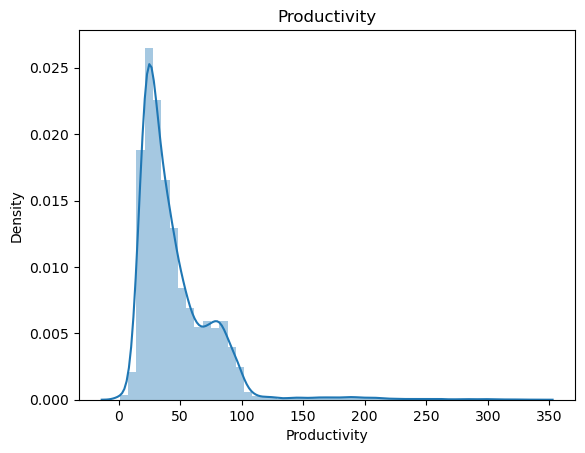

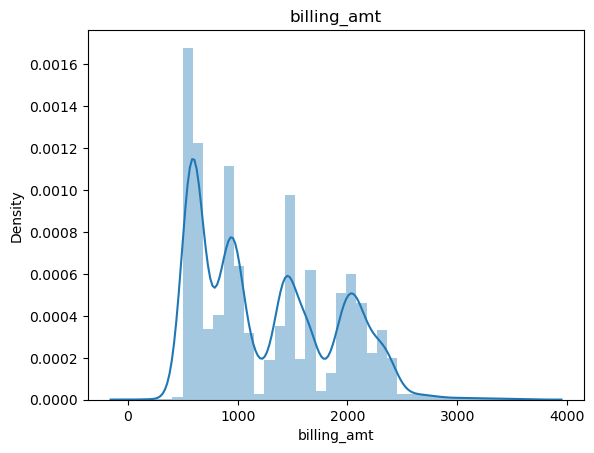

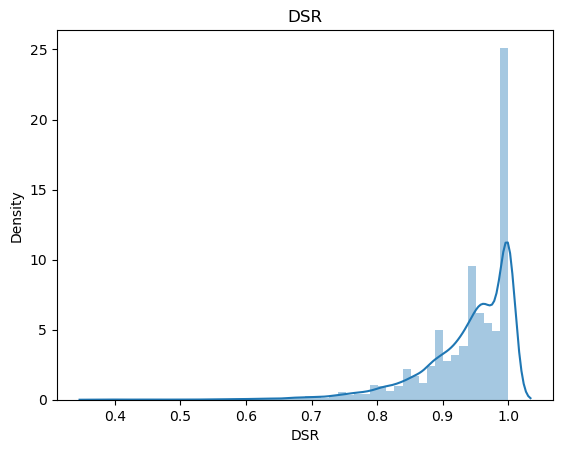

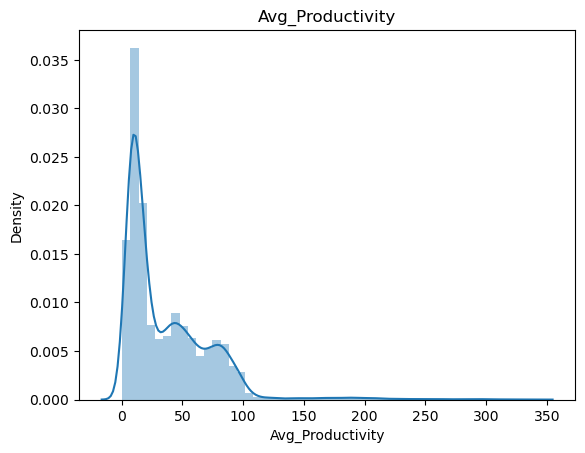

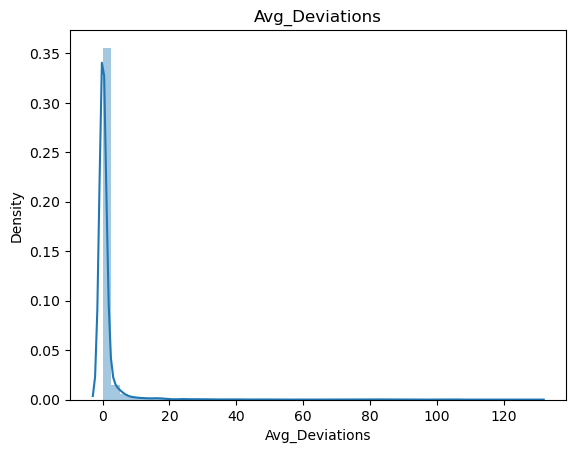

In [35]:
for i in num:
    sns.distplot(monthly_df[i])
    plt.title(i)
    plt.show()

In [36]:
cat = []
for j in monthly_df :
    if monthly_df[j].dtypes == 'object':
        cat.append(j)
cat

['Delivery Agent ID', 'Vehicle_type', 'city', 'Site Code']

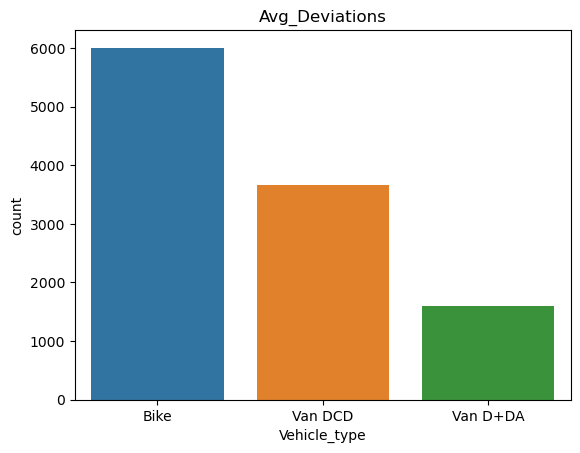

In [37]:
sns.countplot(monthly_df['Vehicle_type'])
plt.title(j)
plt.show()

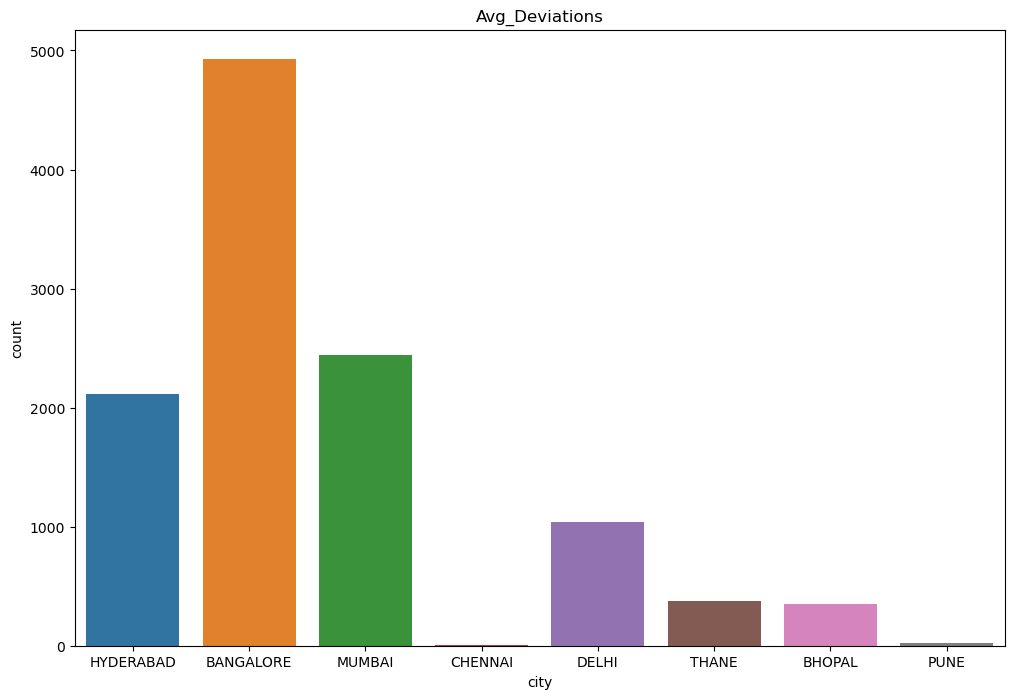

In [38]:
plt.figure(figsize = (12,8))
sns.countplot(monthly_df['city'])
plt.title(j)
plt.show()

**Part-E**

Now that you have understood the distributions of the data in the monthly_df, you need to:

1.   Classify each agent on the basis of their DSR as either "DSR-ok" or "DSR-low"
2.   Classify each agent on the basis of the number of deviations they've had as either "deviations-ok" or "deviations-high"

This classification should be represented in two new columns in the monthly_df called "DSR Category" and "Deviations Category"

Note that DSR and Deviations are comparable across all vehicle types, all shifts and all geographical areas. For example - there is no valid reason for vans in Mumbai to have lower DSR or higher deviations when compared to bikes in Hyderabad or Banagalore or Pune. The same benchmark of quality applies to all vehicle types working all shifts in all cities.  

Once again, you are not being given any explicit thresholds to use for this classification. You are expected to use your analysis to decide the thresholds.

An effective solution would be one which identifies a smaller group of people that contribute to the largest part of the problem.


In [39]:
monthly_df['DSR'].min()

0.38

In [40]:
monthly_df['Avg_Deviations'].min()

0.0

In [41]:
# Analyze the distribution and set thresholds (customize these)
dsr_low_threshold = 0.6
deviations_high_threshold = 0.7

# Function to classify DSR category
def classify_dsr(monthly_df):
    if monthly_df['DSR'] >= dsr_low_threshold:
        return 'DSR-ok'
    else:
        return 'DSR-low'

# Function to classify deviations category
def classify_deviations(monthly_df):
    if monthly_df['Avg_Deviations'] <= deviations_high_threshold:
        return 'deviations-ok'
    else:
        return 'deviations-high'

# Apply classification functions and create new columns
monthly_df['DSR Category'] = monthly_df.apply(classify_dsr, axis=1)
monthly_df['Deviations Category'] = monthly_df.apply(classify_deviations, axis=1)

In [42]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,1.00,30.00,0.0,DSR-ok,deviations-ok
1,DA_273,Van DCD,4,BANGALORE,Site_10,81,0,9,81,2075,1.00,81.00,9.0,DSR-ok,deviations-high
2,DA_370,Bike,4,BANGALORE,Site_3,19,2,0,17,571,0.89,5.67,0.0,DSR-ok,deviations-ok
3,DA_118,Van DCD,4,BANGALORE,Site_10,16,1,0,15,1275,0.94,7.50,0.0,DSR-ok,deviations-ok
4,DA_136,Van DCD,4,BANGALORE,Site_4,46,5,0,41,1353,0.89,20.50,0.0,DSR-ok,deviations-ok


# Question 4

**Part-A**

Create a new dataframe that shows the number of A, B, and C shifts each delivery agent has done in the whole month. Also include in a separate column the total number of low productivity shifts each delivery agent has had in the whole month. Call this new dataframe "shifts_df". Make sure that there are no nan values in the new dataframe.

To be more clear, the new dataframe(shifts_df) should have the following columns:

* Delivery Agent ID
* Total no. of 'A' Shifts
* Total no. of 'B' Shifts
* Total no. of 'C' Shifts
* Total no. of low productivity shifts

In [43]:
monthly_df.head()

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,1.00,30.00,0.0,DSR-ok,deviations-ok
1,DA_273,Van DCD,4,BANGALORE,Site_10,81,0,9,81,2075,1.00,81.00,9.0,DSR-ok,deviations-high
2,DA_370,Bike,4,BANGALORE,Site_3,19,2,0,17,571,0.89,5.67,0.0,DSR-ok,deviations-ok
3,DA_118,Van DCD,4,BANGALORE,Site_10,16,1,0,15,1275,0.94,7.50,0.0,DSR-ok,deviations-ok
4,DA_136,Van DCD,4,BANGALORE,Site_4,46,5,0,41,1353,0.89,20.50,0.0,DSR-ok,deviations-ok


In [44]:
daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Majority_vehicle_type,Total Assigned,Productivity,Productivity Category
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,1,0,0,3,1,26,0,955,Bike,30,30,productivity-low
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,1,0,9,60,1,20,0,2075,Bike,81,81,productivity-ok
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,3,2,0,15,0,2,0,571,Bike,19,17,productivity-low
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,2,1,0,15,0,0,0,1275,Bike,16,15,productivity-low
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,2,5,0,40,1,0,0,1353,Bike,46,41,productivity-low


In [45]:
daily_df.groupby(['Delivery Agent ID'],as_index = False)['Shift','Productivity Category'].value_counts()

,Delivery Agent ID,Shift,Productivity Category,count
0,DA_1,1,productivity-low,8
1,DA_1,1,productivity-ok,5
2,DA_1,2,productivity-low,5
3,DA_1,3,productivity-low,4
4,DA_10,2,productivity-low,7
...,...,...,...,...
1424,DA_97,1,productivity-low,2
1425,DA_98,1,productivity-low,2
1426,DA_99,1,productivity-low,9
1427,DA_99,3,productivity-low,6


In [46]:
# group by Delivery agent 
shifts_df = daily_df.groupby(['Delivery Agent ID','Productivity Category'],as_index = False)['Shift'].value_counts()

In [47]:
#replace shifts values with A,B,C
shifts_df['Shift'] = shifts_df['Shift'].replace({1:'A',2:'B',3:'C'})

In [48]:
#selecting the productivity-low output only
shifts_df =shifts_df[shifts_df['Productivity Category']=='productivity-low']
shifts_df.head()

,Delivery Agent ID,Productivity Category,Shift,count
0,DA_1,productivity-low,A,8
1,DA_1,productivity-low,B,5
2,DA_1,productivity-low,C,4
4,DA_10,productivity-low,B,7
5,DA_10,productivity-low,A,1


In [49]:
# Pivot the data to get the total no of low productivity
shifts_pivot = shifts_df.pivot_table(index=['Delivery Agent ID'], columns='Shift', values='count', fill_value=0).reset_index()
shifts_pivot['Total no. of low productivity shifts'] = shifts_pivot['A'] + shifts_pivot['B'] + shifts_pivot['C']

In [50]:
#renaming the column names 
shifts_df =shifts_pivot.rename({"A":"Total no. of 'A' Shifts","B":"Total no. of 'B' Shifts","C":"Total no. of 'C' Shifts"},axis = 1)

In [51]:
shifts_df

Shift,Delivery Agent ID,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts
0,DA_1,8,5,4,17
1,DA_10,1,7,0,8
2,DA_100,3,0,0,3
3,DA_101,3,1,0,4
4,DA_102,25,0,0,25
...,...,...,...,...,...
628,DA_95,0,2,0,2
629,DA_96,2,4,0,6
630,DA_97,2,3,0,5
631,DA_98,2,0,0,2


**Part B**

Merge the monthly_df and the shifts_df so that all the features are in one single dataframe. Call this new dataframe "final_df".

Then calculate and create a new column called "%_low_prod_shifts". For the values in this column divide the total number of low productivity shifts by the total no. of shifts worked and round the result to two decimal places.

In [52]:
# Merge the dataframes based on a common key, let's say 'Delivery Agent ID'
final_df = pd.merge(monthly_df, shifts_df, on='Delivery Agent ID')
final_df

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,DSR,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,1.00,30.00,0.0,DSR-ok,deviations-ok,23,0,1,24
1,DA_280,Bike,4,HYDERABAD,Site_22,39,1,4,38,971,0.97,38.00,4.0,DSR-ok,deviations-high,23,0,1,24
2,DA_280,Bike,4,HYDERABAD,Site_22,31,3,0,28,951,0.90,28.00,0.0,DSR-ok,deviations-ok,23,0,1,24
3,DA_280,Bike,4,HYDERABAD,Site_22,44,0,0,44,983,1.00,44.00,0.0,DSR-ok,deviations-ok,23,0,1,24
4,DA_280,Bike,4,HYDERABAD,Site_22,31,0,0,31,957,1.00,31.00,0.0,DSR-ok,deviations-ok,23,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,DA_641,Bike,4,HYDERABAD,Site_21,35,6,0,29,607,0.83,9.67,0.0,DSR-ok,deviations-ok,0,0,2,2
10289,DA_641,Bike,4,HYDERABAD,Site_21,24,4,3,20,580,0.83,6.67,1.0,DSR-ok,deviations-high,0,0,2,2
10290,DA_507,Bike,6,DELHI,Site_17,25,1,0,24,813,0.96,12.00,0.0,DSR-ok,deviations-ok,0,1,0,1
10291,DA_147,Van DCD,4,BANGALORE,Site_4,24,1,0,23,1431,0.96,11.50,0.0,DSR-ok,deviations-ok,0,2,0,2


In [53]:
final_df.columns

Index(['Delivery Agent ID', 'Vehicle_type', 'cluster', 'city', 'Site Code',
       'Total Assigned', 'Unsuccessful_Attempts', 'Process_Deviations',
       'Productivity', 'billing_amt', 'DSR', 'Avg_Productivity',
       'Avg_Deviations', 'DSR Category', 'Deviations Category',
       'Total no. of 'A' Shifts', 'Total no. of 'B' Shifts',
       'Total no. of 'C' Shifts', 'Total no. of low productivity shifts'],
      dtype='object')

In [54]:
# Calculate the total number of shifts worked
total_no_of_shitfs = daily_df[daily_df['Productivity Category']=='productivity-low'].shape[0]
total_no_of_shitfs

8189

In [55]:
final_df['total_shifts'] = final_df["Total no. of 'A' Shifts"] +  final_df["Total no. of 'B' Shifts"] +  final_df["Total no. of 'C' Shifts"]

In [56]:
daily_df_shift = daily_df['Shift'].sum()
daily_df_shift

20317

In [57]:
(daily_df[daily_df['Productivity Category']=='productivity-low'].shape[0]/ daily_df['Shift'].sum()) * 100

40.30614756115568

In [58]:
final_df['%_low_prod_shifts'] = round((daily_df[daily_df['Productivity Category']=='productivity-low'].shape[0]/ daily_df['Shift'].sum()) * 100,2)

In [59]:
final_df

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,...,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,total_shifts,%_low_prod_shifts
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,...,30.00,0.0,DSR-ok,deviations-ok,23,0,1,24,24,40.31
1,DA_280,Bike,4,HYDERABAD,Site_22,39,1,4,38,971,...,38.00,4.0,DSR-ok,deviations-high,23,0,1,24,24,40.31
2,DA_280,Bike,4,HYDERABAD,Site_22,31,3,0,28,951,...,28.00,0.0,DSR-ok,deviations-ok,23,0,1,24,24,40.31
3,DA_280,Bike,4,HYDERABAD,Site_22,44,0,0,44,983,...,44.00,0.0,DSR-ok,deviations-ok,23,0,1,24,24,40.31
4,DA_280,Bike,4,HYDERABAD,Site_22,31,0,0,31,957,...,31.00,0.0,DSR-ok,deviations-ok,23,0,1,24,24,40.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,DA_641,Bike,4,HYDERABAD,Site_21,35,6,0,29,607,...,9.67,0.0,DSR-ok,deviations-ok,0,0,2,2,2,40.31
10289,DA_641,Bike,4,HYDERABAD,Site_21,24,4,3,20,580,...,6.67,1.0,DSR-ok,deviations-high,0,0,2,2,2,40.31
10290,DA_507,Bike,6,DELHI,Site_17,25,1,0,24,813,...,12.00,0.0,DSR-ok,deviations-ok,0,1,0,1,1,40.31
10291,DA_147,Van DCD,4,BANGALORE,Site_4,24,1,0,23,1431,...,11.50,0.0,DSR-ok,deviations-ok,0,2,0,2,2,40.31


**Part C**

Create three new columns - "%_shifts_A", "%_shifts_b", and "%_shifts_C".

If a delivery agent had a total of 10 shifts, and 5 out of them were Shift A, then "%_shifts_A" should be 0.5.

All values in the new columns should be rounded to 2 decimal places.

In [60]:
# Calculate the percentage of shifts for each category
final_df['%_shifts_A'] = round(final_df["Total no. of 'A' Shifts"] / final_df['total_shifts'], 2)
final_df['%_shifts_B'] = round(final_df["Total no. of 'B' Shifts"] / final_df['total_shifts'], 2)
final_df['%_shifts_C'] = round(final_df["Total no. of 'C' Shifts"] / final_df['total_shifts'], 2)

In [61]:
final_df

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,...,Deviations Category,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,total_shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,...,deviations-ok,23,0,1,24,24,40.31,0.96,0.0,0.04
1,DA_280,Bike,4,HYDERABAD,Site_22,39,1,4,38,971,...,deviations-high,23,0,1,24,24,40.31,0.96,0.0,0.04
2,DA_280,Bike,4,HYDERABAD,Site_22,31,3,0,28,951,...,deviations-ok,23,0,1,24,24,40.31,0.96,0.0,0.04
3,DA_280,Bike,4,HYDERABAD,Site_22,44,0,0,44,983,...,deviations-ok,23,0,1,24,24,40.31,0.96,0.0,0.04
4,DA_280,Bike,4,HYDERABAD,Site_22,31,0,0,31,957,...,deviations-ok,23,0,1,24,24,40.31,0.96,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,DA_641,Bike,4,HYDERABAD,Site_21,35,6,0,29,607,...,deviations-ok,0,0,2,2,2,40.31,0.00,0.0,1.00
10289,DA_641,Bike,4,HYDERABAD,Site_21,24,4,3,20,580,...,deviations-high,0,0,2,2,2,40.31,0.00,0.0,1.00
10290,DA_507,Bike,6,DELHI,Site_17,25,1,0,24,813,...,deviations-ok,0,1,0,1,1,40.31,0.00,1.0,0.00
10291,DA_147,Van DCD,4,BANGALORE,Site_4,24,1,0,23,1431,...,deviations-ok,0,2,0,2,2,40.31,0.00,1.0,0.00


# Question 5

**Part-A:**

*Irregularity:*

When we say a delivery agent is irregular to work, we mean that they were associated with us for a certain period, however, during this period they were absent frequently.

For example - A delivery agent's first day of work was 5th June and the last day of work was 25th June. However during this period, the agent worked for only 10 out of the possible 20 days. We would then say that this delivery agent is "irregular".

Let's look at another scenario where a delivery agent has worked for only 5 out of the possible 30 days in the whole month, and those 5 days are towards the end of the month, it probably means that they joined us late, and hence cannot be classified as "irreguar", and they should ideally be classified as "new".

Keeping this context in mind, classify each delivery agent in the dataset as "regular" or "irregular" or "new". This classification should be shown in a new dataframe called "regularity_df". This new dataframe should contain only two columns - "Delivery Agent ID" and "Regularity Classification"

In this question, we are not explicity prescribing the logic nor the threshold of working days to be used for this classification. You are expected to get creative and take a calculated decision on how to go about this.

Once all the delivery agents have been classified, explain the logic and reasoning behind the method you have chosen.

In [62]:
daily_df['Date'].nunique()

30

In [63]:
daily_df

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Majority_vehicle_type,Total Assigned,Productivity,Productivity Category
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,1,0,0,3,1,26,0,955,Bike,30,30,productivity-low
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,1,0,9,60,1,20,0,2075,Bike,81,81,productivity-ok
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,3,2,0,15,0,2,0,571,Bike,19,17,productivity-low
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,2,1,0,15,0,0,0,1275,Bike,16,15,productivity-low
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,2,5,0,40,1,0,0,1353,Bike,46,41,productivity-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11274,Site_10,BANGALORE,Van DCD,4,2023-06-30,DA_377,2,0,0,42,0,0,0,1469,Bike,42,42,productivity-low
11275,Site_27,MUMBAI,Van D+DA,5,2023-06-04,DA_351,2,2,5,18,2,2,0,1609,Bike,24,22,productivity-low
11276,Site_3,BANGALORE,Van DCD,4,2023-06-19,DA_685,2,4,0,23,1,2,0,1437,Bike,30,26,productivity-low
11277,Site_3,BANGALORE,Van DCD,4,2023-06-10,DA_10,1,4,4,64,2,8,0,2040,Bike,78,74,productivity-ok


In [64]:
import pandas as pd

# Assuming you have a dataframe named 'daily_df' with columns 'Delivery Agent ID', 'Date', and 'Worked'

# Calculate the total number of possible working days for each agent
possible_working_days = daily_df.groupby('Delivery Agent ID')['Date'].nunique()

# Calculate the total number of actual working days for each agent
actual_working_days = daily_df.groupby('Delivery Agent ID')['Total Assigned'].sum()

# Calculate the percentage of working days for each agent
percentage_working_days = (actual_working_days / possible_working_days) * 100

# Classify agents based on the calculated percentages
def classify_regularity(percentage):
    if percentage > 75:
        return 'Regular'
    elif percentage > 10:
        return 'Irregular'
    else:
        return 'New'

# Apply the classification function to the percentage_working_days Series
regularity_classification = percentage_working_days.apply(classify_regularity)

# Create a new dataframe 'regularity_df'
regularity_df = pd.DataFrame({
    'Delivery Agent ID': percentage_working_days.index,
    'Regularity Classification': regularity_classification.values
})

# Print the 'regularity_df'
print(regularity_df)

    Delivery Agent ID Regularity Classification
0                DA_1                   Regular
1               DA_10                   Regular
2              DA_100                   Regular
3              DA_101                   Regular
4              DA_102                   Regular
..                ...                       ...
691             DA_95                   Regular
692             DA_96                   Regular
693             DA_97                   Regular
694             DA_98                   Regular
695             DA_99                   Regular

[696 rows x 2 columns]


In [65]:
regularity_df =pd.DataFrame(regularity_df)
regularity_df

,Delivery Agent ID,Regularity Classification
0,DA_1,Regular
1,DA_10,Regular
2,DA_100,Regular
3,DA_101,Regular
4,DA_102,Regular
...,...,...
691,DA_95,Regular
692,DA_96,Regular
693,DA_97,Regular
694,DA_98,Regular


In [66]:
regularity_df['Regularity Classification'].value_counts()

Regular    696
Name: Regularity Classification, dtype: int64

**Part-B**

Merge the regularity_df into the final_df so that all the features are available in one single dataframe.

In [67]:
# Merge regularity_df into final_df based on 'Delivery Agent ID'
final_df = pd.merge(final_df, regularity_df, on='Delivery Agent ID', how='left')
final_df

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,...,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,total_shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,Regularity Classification
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
1,DA_280,Bike,4,HYDERABAD,Site_22,39,1,4,38,971,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
2,DA_280,Bike,4,HYDERABAD,Site_22,31,3,0,28,951,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
3,DA_280,Bike,4,HYDERABAD,Site_22,44,0,0,44,983,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
4,DA_280,Bike,4,HYDERABAD,Site_22,31,0,0,31,957,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,DA_641,Bike,4,HYDERABAD,Site_21,35,6,0,29,607,...,0,0,2,2,2,40.31,0.00,0.0,1.00,Regular
10289,DA_641,Bike,4,HYDERABAD,Site_21,24,4,3,20,580,...,0,0,2,2,2,40.31,0.00,0.0,1.00,Regular
10290,DA_507,Bike,6,DELHI,Site_17,25,1,0,24,813,...,0,1,0,1,1,40.31,0.00,1.0,0.00,Regular
10291,DA_147,Van DCD,4,BANGALORE,Site_4,24,1,0,23,1431,...,0,2,0,2,2,40.31,0.00,1.0,0.00,Regular


# Question 6

**Part-A**

Keeping in mind that the final_df contains a mix of categorical and numerical variables, find out if any of the features are correlated to each other using an appropriate method. Find out and report if any variables have a strong positive or negative correlation.

Explain which method(s) you have chosen and why.

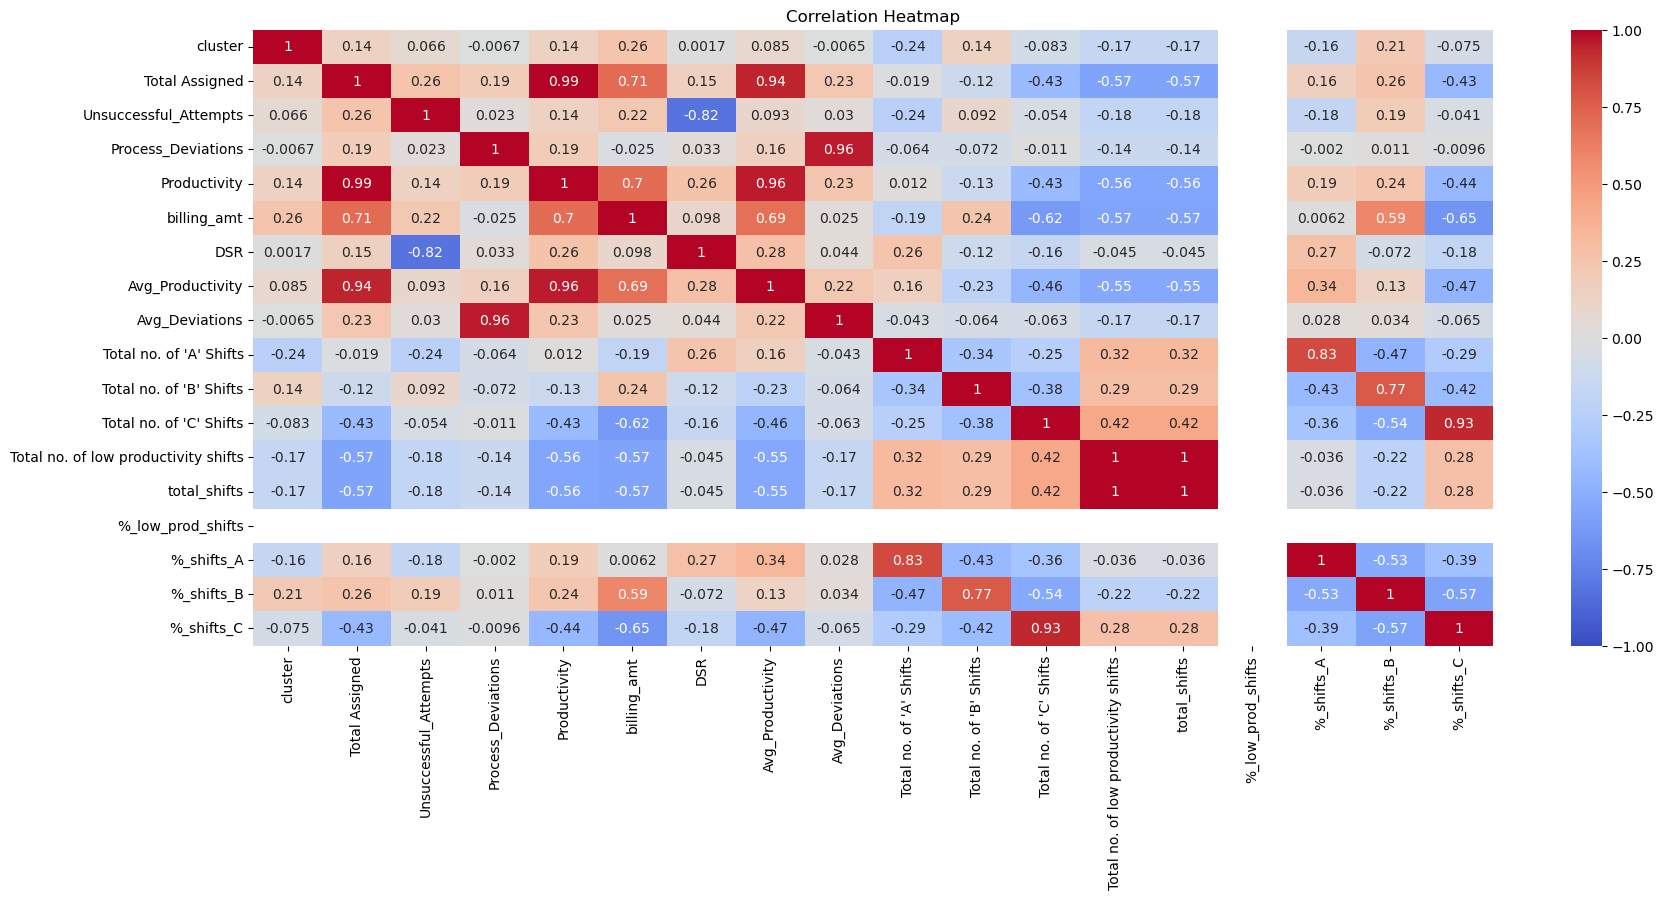

In [68]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True,vmin = -1,vmax = 1, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In the heatmap, the color indicates the strength and direction of the correlation. Positive correlations are represented by warmer colors (reds), while negative correlations are represented by cooler colors (blues).

**Part-B**

Explain what you have gathered and understood about this data after having examined the correlations.

# Question 7

Following a comprehensive analysis of the final_df, the next phase involves categorizing delivery agents into distinct clusters. The primary aim of establishing these clusters is to uncover specific and noteworthy attributes within each group, enabling the formulation of targeted strategies for improvement.

In this scenario, the objective is to segment delivery agents into various groups, facilitating an understanding of which group requires enhancements in specific metrics. Typically, exceptional performing delivery agents exhibit elevated DSR (Delivery Success Rate), minimal deviations, heightened productivity, and consistent work attendance. Conversely, underperforming agents display contrasting characteristics. Furthermore, there will be individuals who fall within intermediate ranges.

During the creation of agent groups, it's essential to facilitate the breakdown into smaller subsets within the population. This breakdown aids in pinpointing precise factors contributing to subpar performance.

**Part-A**

* Keeping the context in mind, choose and implement a method to perform this grouping. Create a new column to indicate which group each delivery agent belongs to. Explain why you have chosen this method.
* How many groups have you chosen to create and why?
______________________________________________________________________________
*IMPORTANT NOTES:*
* You don't necessarily have to use every single feature for the grouping. You may choose to leave out some variables and explain why you have chosen to leave them out.

* Remember that the final_df contains several features which were created from original features in the raw data so that analysis and grouping becomes easier. Carefully go through all the features we currently have and discard what you think is not required when grouping on the basis of performance.

* Remember that performances are comparable across geographical areas. There is no reason to have different standards in different cities.

* You may choose to use hard coded rules for grouping the delivery agents (OR) you may even choose to use ML algorithms. Both approaches are valid as long as you are able to justify the logic and reasoning behind your approach.

* If you're finding it difficult to decide how many groups to divide them into, don't worry, this is common when dealing with data in the real world. Finding an appropriate solution requires trying out multiple approaches and analyzing results to select the method that seems to make most sense or fetches the highest scores on certain metrics.

In [69]:
final_df

,Delivery Agent ID,Vehicle_type,cluster,city,Site Code,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,billing_amt,...,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,total_shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,Regularity Classification
0,DA_280,Bike,4,HYDERABAD,Site_22,30,0,0,30,955,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
1,DA_280,Bike,4,HYDERABAD,Site_22,39,1,4,38,971,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
2,DA_280,Bike,4,HYDERABAD,Site_22,31,3,0,28,951,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
3,DA_280,Bike,4,HYDERABAD,Site_22,44,0,0,44,983,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
4,DA_280,Bike,4,HYDERABAD,Site_22,31,0,0,31,957,...,23,0,1,24,24,40.31,0.96,0.0,0.04,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,DA_641,Bike,4,HYDERABAD,Site_21,35,6,0,29,607,...,0,0,2,2,2,40.31,0.00,0.0,1.00,Regular
10289,DA_641,Bike,4,HYDERABAD,Site_21,24,4,3,20,580,...,0,0,2,2,2,40.31,0.00,0.0,1.00,Regular
10290,DA_507,Bike,6,DELHI,Site_17,25,1,0,24,813,...,0,1,0,1,1,40.31,0.00,1.0,0.00,Regular
10291,DA_147,Van DCD,4,BANGALORE,Site_4,24,1,0,23,1431,...,0,2,0,2,2,40.31,0.00,1.0,0.00,Regular


In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have the merged dataframe: final_df

# Select the relevant columns for clustering
selected_columns = ['DSR', 'Process_Deviations', 'Productivity', ]

# Standardize the selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df[selected_columns])

# Choose the number of clusters (groups) you want to create
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
final_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Print the updated final_df with the assigned clusters
print(final_df[['Delivery Agent ID', 'Cluster']])


      Delivery Agent ID  Cluster
0                DA_280        0
1                DA_280        0
2                DA_280        0
3                DA_280        0
4                DA_280        0
...                 ...      ...
10288            DA_641        2
10289            DA_641        2
10290            DA_507        0
10291            DA_147        0
10292            DA_147        0

[10293 rows x 2 columns]


I've chosen to create 4 clusters (num_clusters = 4) for simplicity. You can adjust this number based on your data and objectives. Choosing the number of clusters involves some trial and error and might require domain knowledge or additional analysis.

K-means Clustering: K-means is widely used for partitioning data into clusters. It's chosen here because it's relatively easy to implement and interpretable. It also works well when the data clusters are approximately spherical and have similar sizes. It's important to note that K-means is sensitive to the initial placement of cluster centers.

**Part-B**

Now that the delivery agents are grouped, explore the descriptive statistics or distributions across all the features of each group. Based on that, make your recommendations for what areas need to be improved for each group.

If you'd like to, you may use the same methods used in previous questions to explore distributions.

In [71]:
group_stats = final_df.groupby('Cluster').describe()
group_stats

cluster                                              Total Assigned  \
          count      mean       std  min  25%  50%  75%  max          count   
Cluster                                                                       
0        6295.0  3.953614  0.959827  1.0  4.0  4.0  4.0  6.0         6295.0   
1        1897.0  4.337375  0.783560  1.0  4.0  4.0  5.0  6.0         1897.0   
2        2046.0  3.952590  0.846220  1.0  4.0  4.0  4.0  6.0         2046.0   
3          55.0  3.981818  0.134840  3.0  4.0  4.0  4.0  4.0           55.0   

                    ... %_shifts_B      %_shifts_C                           \
              mean  ...        75%  max      count      mean       std  min   
Cluster             ...                                                       
0        34.477204  ...       0.93  1.0     6295.0  0.309075  0.396569  0.0   
1        81.296784  ...       1.00  1.0     1897.0  0.060928  0.170877  0.0   
2        31.437928  ...       0.95  1.0     2046.0  0.459145  0.433903  0.0   
3        94.309091  ...       0.67  1.0       55.0  0.044545  0.191164  0.0   

                               
         25%   50%   75%  max  
Cluster                        
0        0.0  0.06  0.67  1.0  
1        0.0  0.00  0.00  1.0  
2        0.0  0.33  0.96  1.0  
3        0.0  0.00  0.00  1.0  

[4 rows x 144 columns]

In [72]:
final_df['Cluster'].value_counts()

0    6295
2    2046
1    1897
3      55
Name: Cluster, dtype: int64

In [73]:
for k in final_df:
    if final_df[k].dtypes !='object':
        print(k)

cluster
Total Assigned
Unsuccessful_Attempts
Process_Deviations
Productivity
billing_amt
DSR
Avg_Productivity
Avg_Deviations
Total no. of 'A' Shifts
Total no. of 'B' Shifts
Total no. of 'C' Shifts
Total no. of low productivity shifts
total_shifts
%_low_prod_shifts
%_shifts_A
%_shifts_B
%_shifts_C
Cluster


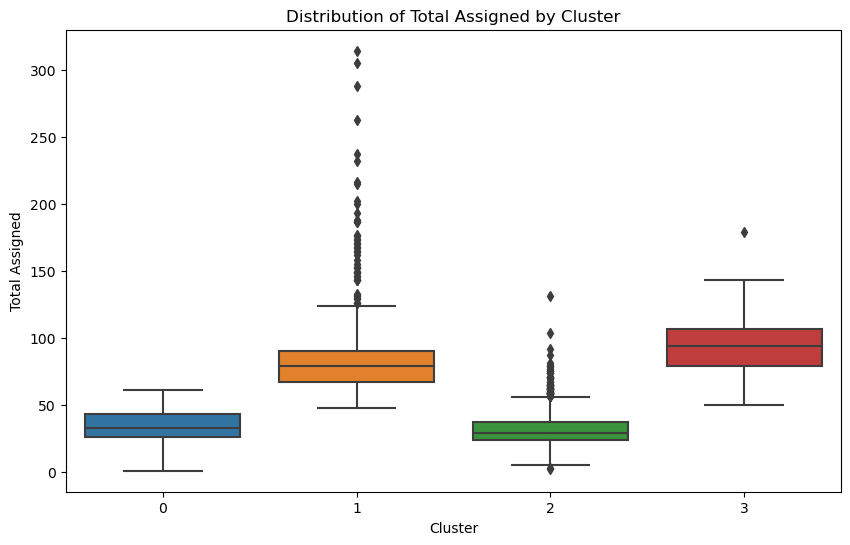

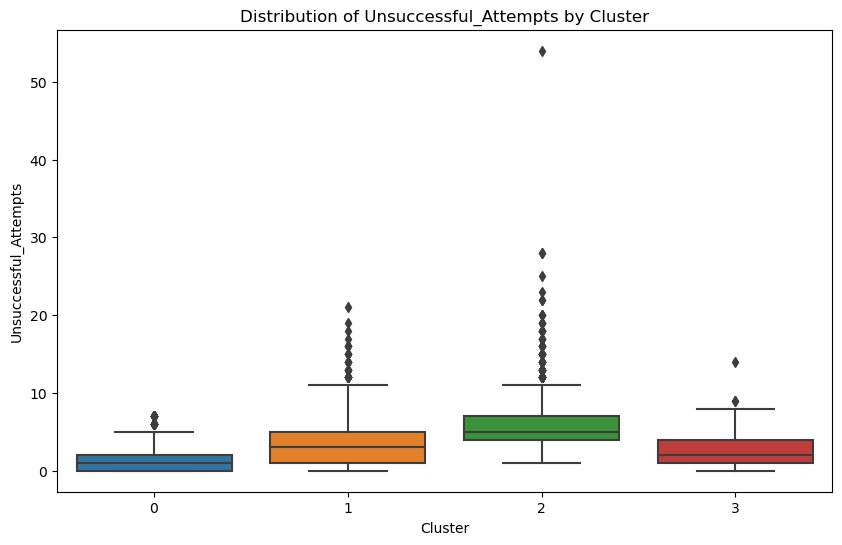

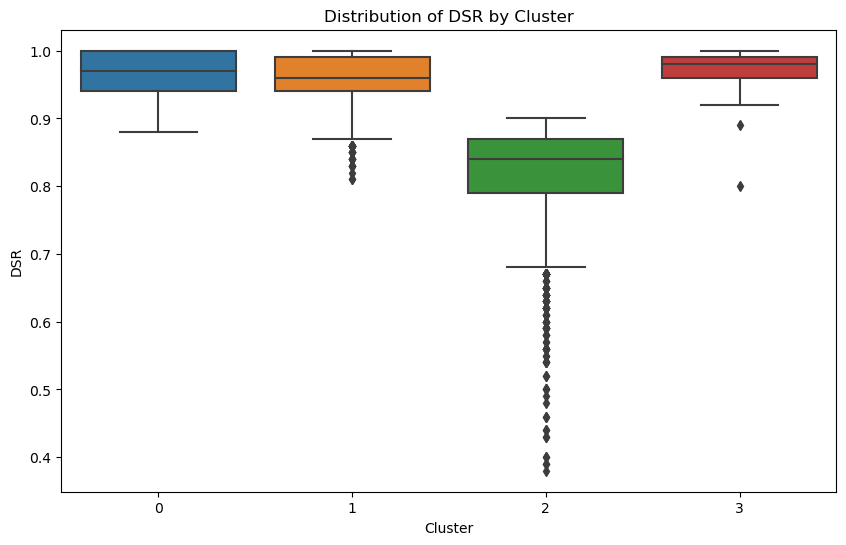

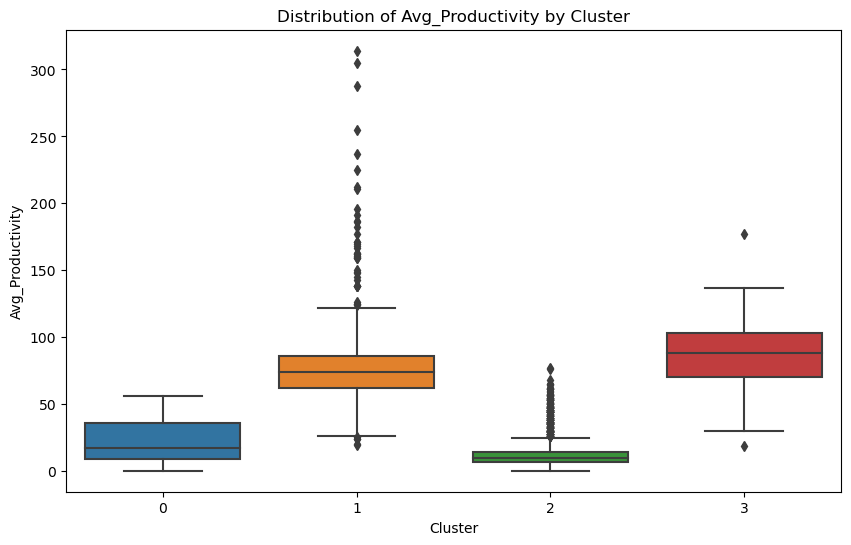

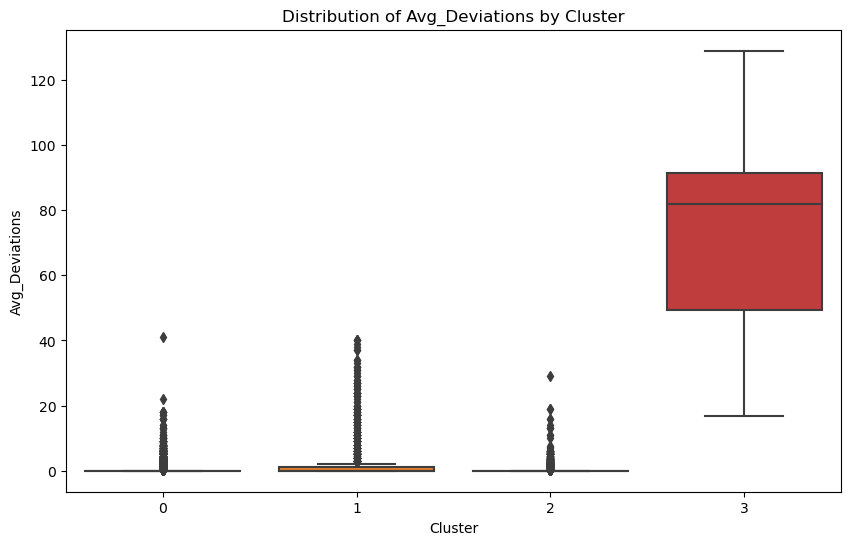

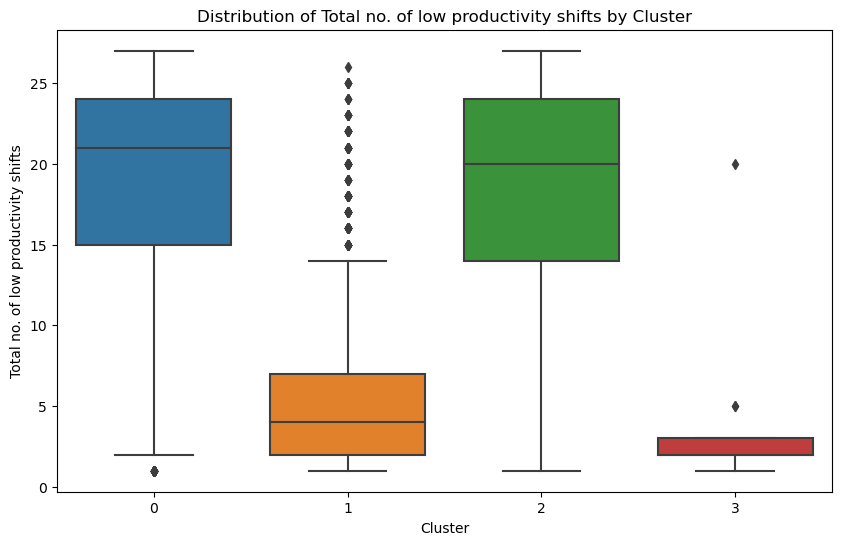

In [74]:
#ploting the graph
selected_features = ['Total Assigned','Unsuccessful_Attempts','DSR','Avg_Productivity','Avg_Deviations','Total no. of low productivity shifts']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=final_df, x='Cluster', y=feature)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

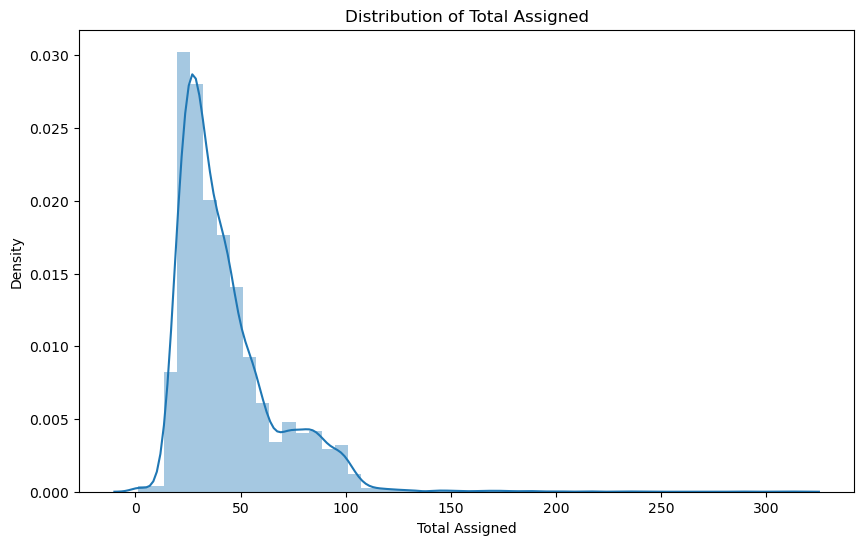

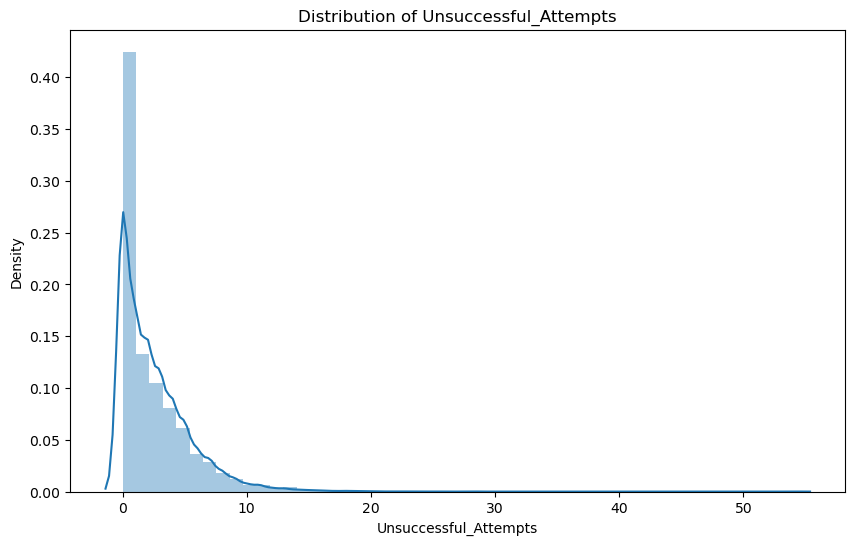

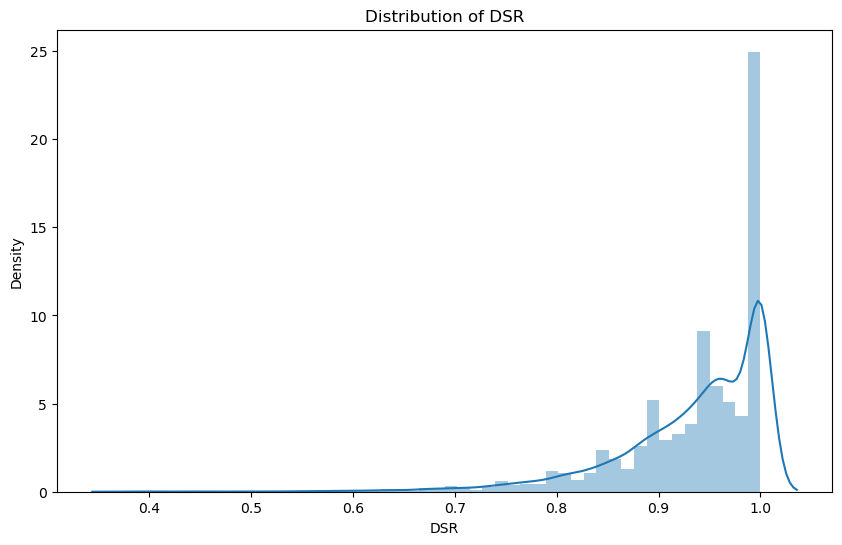

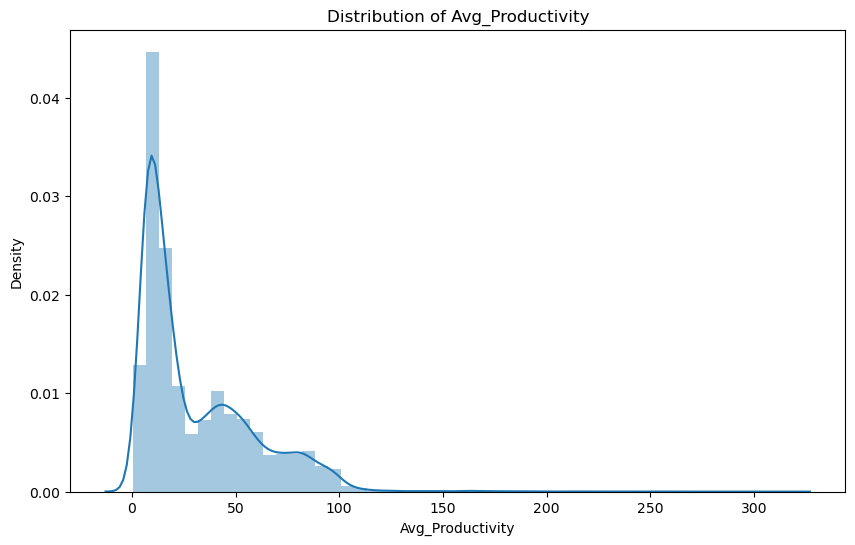

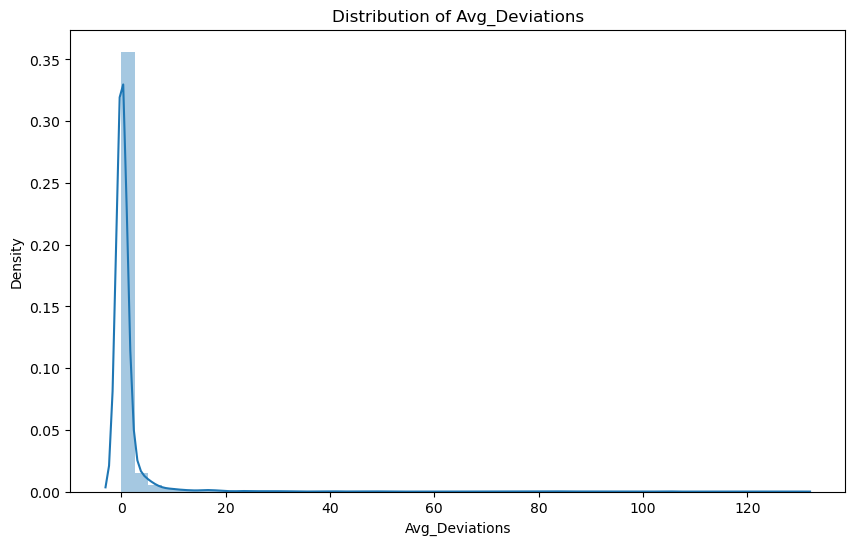

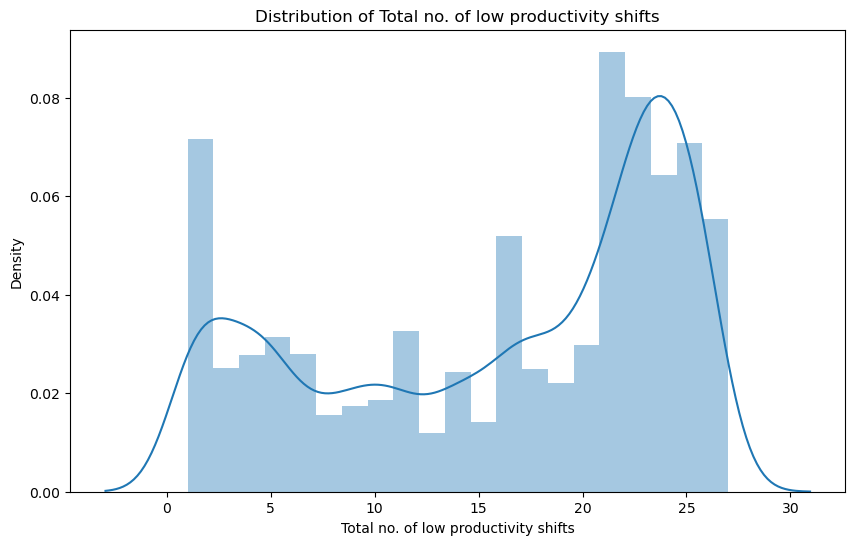

In [75]:
#ploting the graph
selected_features = ['Total Assigned','Unsuccessful_Attempts','DSR','Avg_Productivity','Avg_Deviations','Total no. of low productivity shifts']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.distplot(final_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

Cluster 0 (High Performers):

DSR: Maintain the good performance, maybe focus on retaining such agents.
Deviations: Very low deviations, continue emphasizing adherence to processes.
Productivity: Already high, consider reward programs to motivate further.

Cluster 1 (Average Performers):

DSR: Moderate DSR, train agents to improve customer interactions.
Deviations: Some deviations, provide targeted training to reduce these.
Productivity: Moderate productivity, identify reasons and offer support.


Cluster 2 (Underperformers):

DSR: Low DSR, extensive training to improve customer satisfaction.
Deviations: High deviations, rigorous training on adhering to guidelines.
Productivity: Low productivity, identify bottlenecks and streamline processes.
Attendance: Very low attendance, implement strict attendance policies and support systems.

Average Productivity showed improved in very aspect remaining  others features performed well  in clusters 0 .
DSR: Maintain the good performance, maybe focus on retaining such agents. Deviations: Very low deviations, continue emphasizing adherence to processes. Productivity: Already high, consider reward programs to motivate further.